In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [3]:
df = pd.read_csv("stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df['hypertension'].describe()

count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

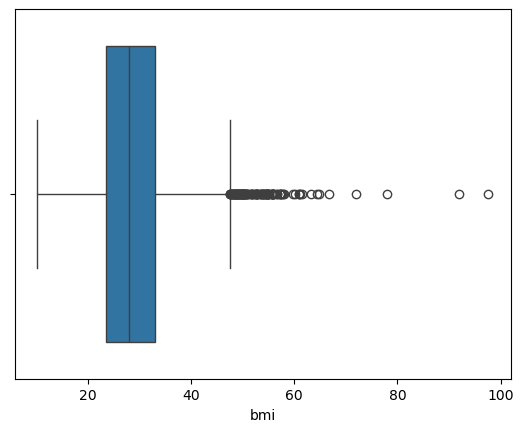

In [7]:
box=sb.boxplot(x=df['bmi'])

In [8]:
outliers = df[(df['avg_glucose_level'] < 10) | (df['avg_glucose_level'] > 45)]

In [9]:
outliers['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

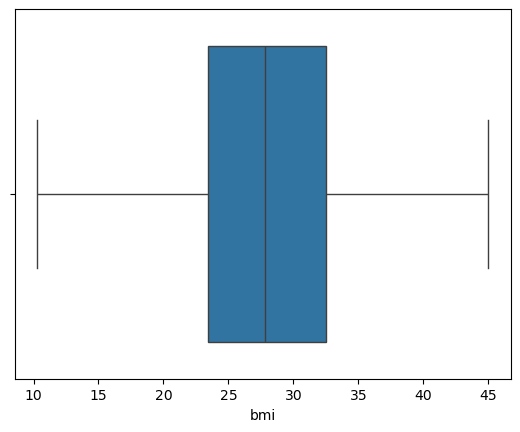

In [10]:
df2=df[(df['bmi']<=45)]
box=sb.boxplot(x=df2['bmi'])

In [11]:
print(df.duplicated().sum())

0


In [12]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [13]:
print(df.head(2))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   

   stroke  
0       1  
1       1  


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [15]:
print(df.tail(1))

         id  gender   age  hypertension  heart_disease ever_married work_type  \
5109  44679  Female  44.0             0              0          Yes  Govt_job   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
5109          Urban              85.28  26.2        Unknown       0  


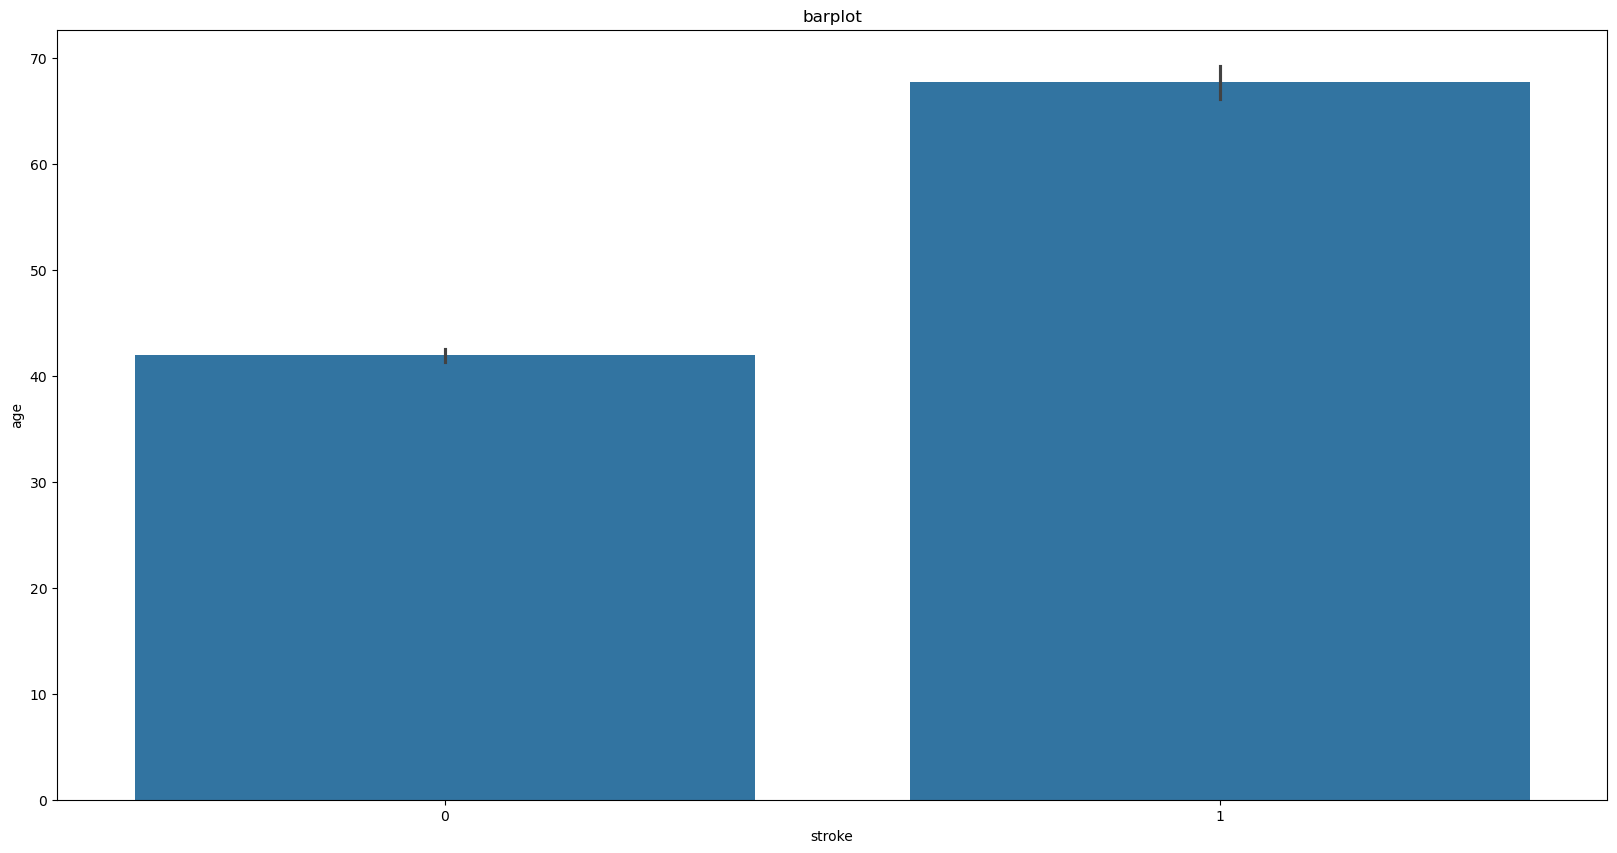

In [16]:
plt.figure(figsize=(20,10))
sb.barplot( x='stroke', y='age', data=df)
plt.title('barplot')
plt.show()

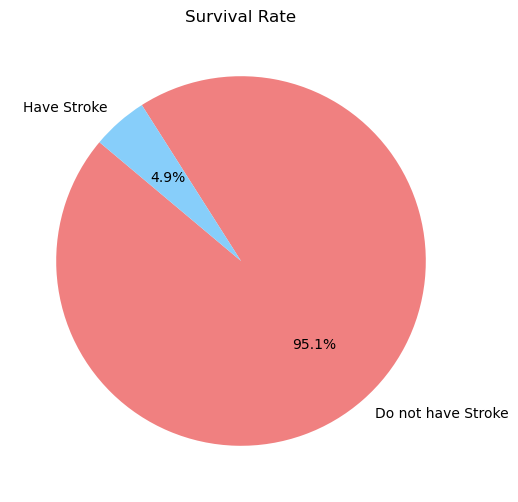

In [17]:
stroke_rate = df['stroke'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(stroke_rate,
        labels=['Do not have Stroke', 'Have Stroke'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightcoral', 'lightskyblue'])
plt.title('Survival Rate')
plt.show()

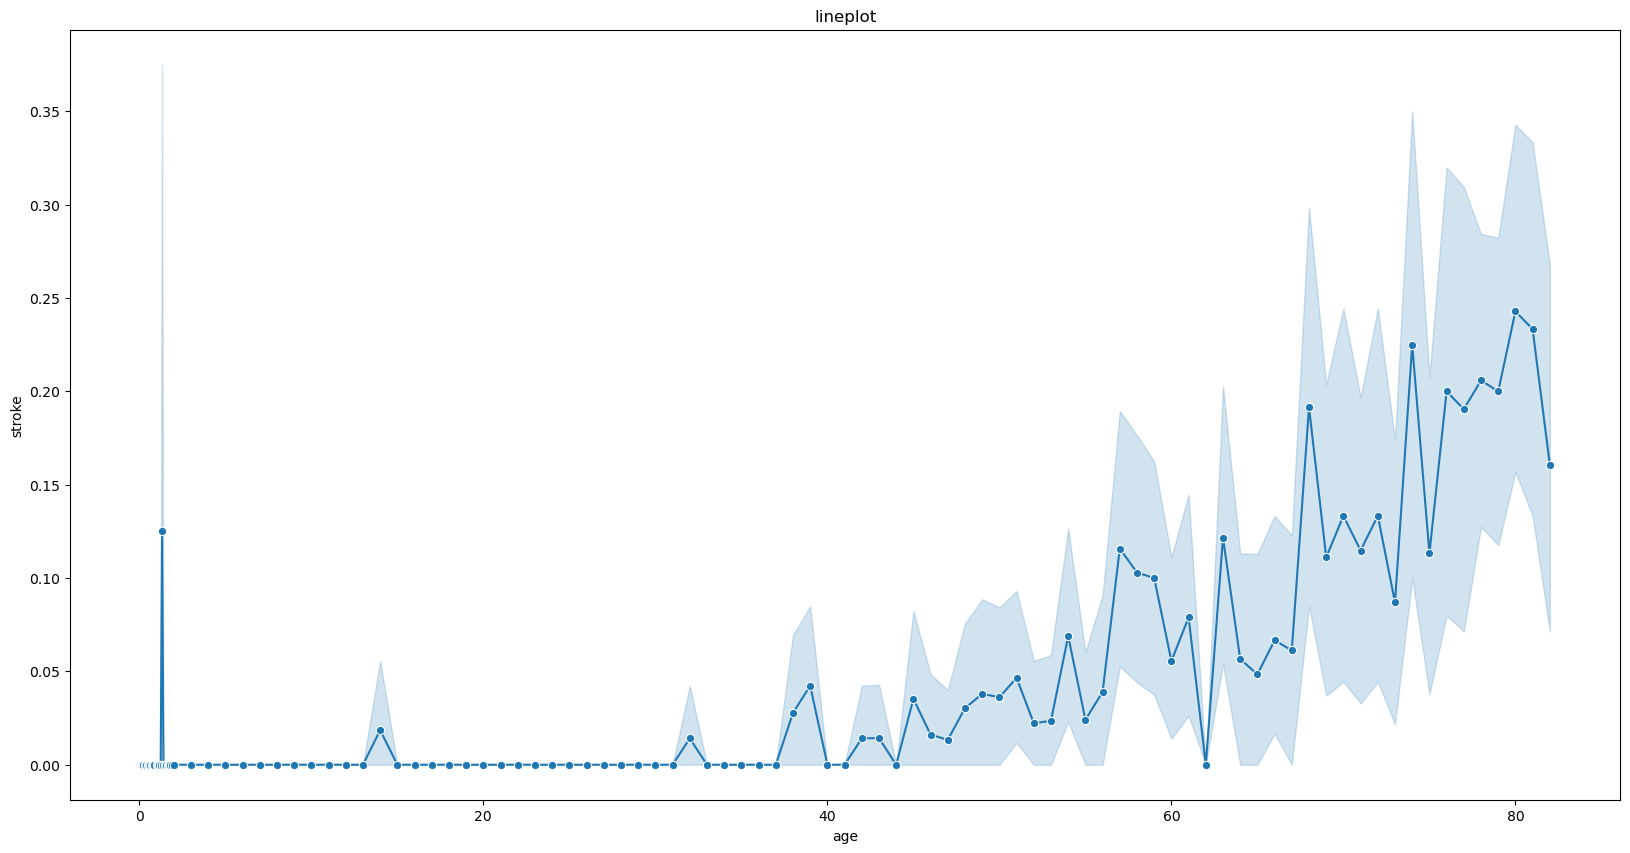

In [18]:
plt.figure(figsize=(20,10))
sb.lineplot( x='age', y='stroke', data=df, marker='o')
plt.title('lineplot')
plt.show()

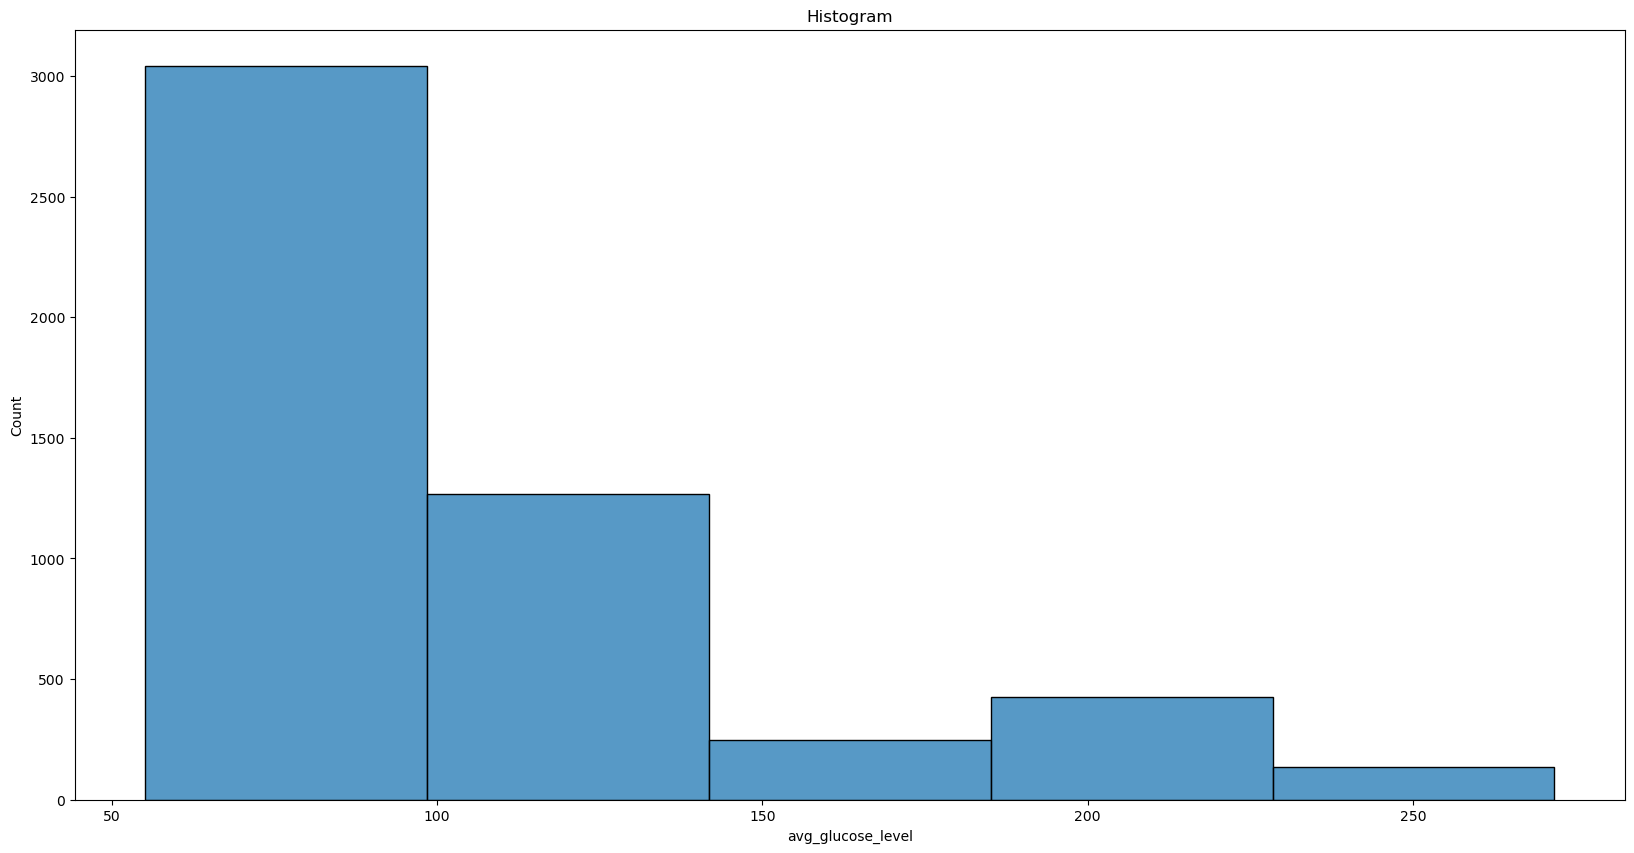

In [19]:
plt.figure(figsize=(20,10))
sb.histplot( df['avg_glucose_level'] , bins=5)
plt.title('Histogram')
plt.show()

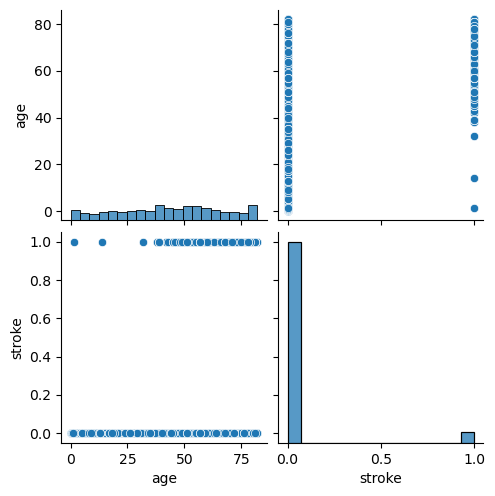

In [20]:
columns_to_plot = ['age', 'stroke']
sb.pairplot(df[columns_to_plot])
plt.show()

In [21]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
correlation_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


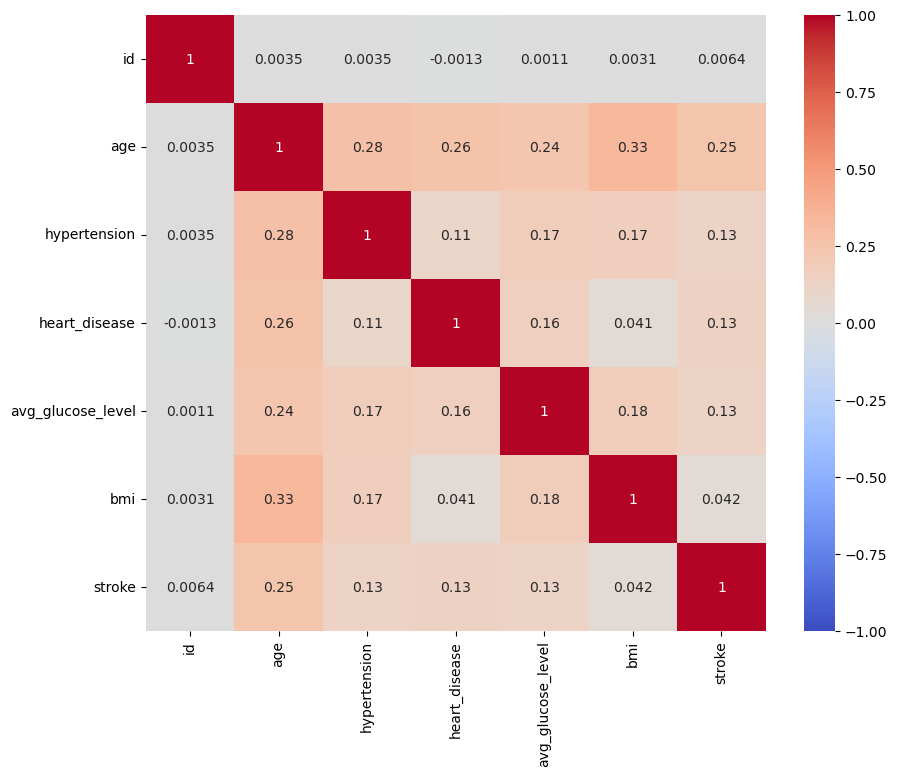

In [22]:
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
sb.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [23]:
correlation_matrix=numeric_df.corr()[(numeric_df.corr()>= 0.5) | (numeric_df.corr()<=-0.5)]
correlation_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.0,NaN,NaN,NaN,NaN,NaN
hypertension,NaN,NaN,1.0,NaN,NaN,NaN,NaN
heart_disease,NaN,NaN,NaN,1.0,NaN,NaN,NaN
avg_glucose_level,NaN,NaN,NaN,NaN,1.0,NaN,NaN
bmi,NaN,NaN,NaN,NaN,NaN,1.0,NaN
stroke,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [24]:
print("\nMissing Data in the Dataset:\n", df.isnull().sum())


Missing Data in the Dataset:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


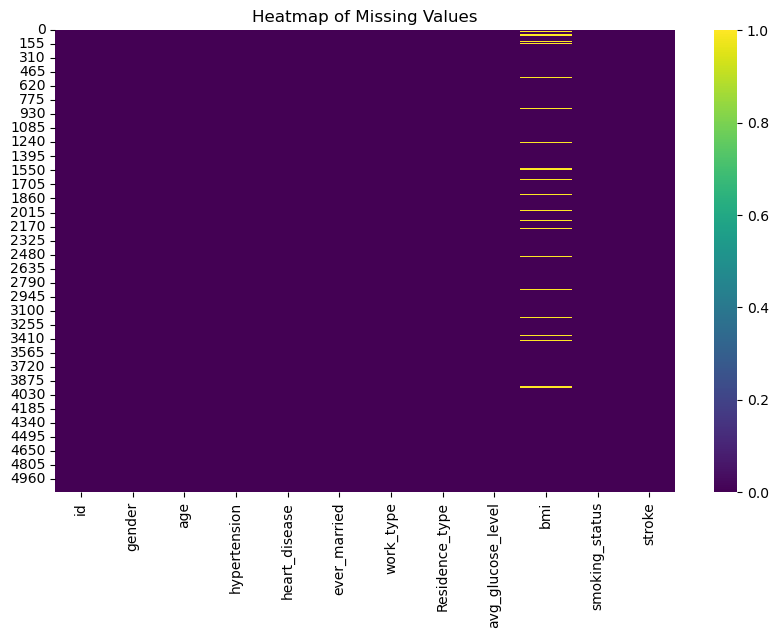

In [25]:
plt.figure(figsize=(10, 6))
sb.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [26]:
print("\nCleaned Dataset:\n", df.drop_duplicates())


Cleaned Dataset:
          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             2

In [27]:
print("\nFeatures in the Dataset:\n", df.columns)


Features in the Dataset:
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [28]:
print("Number of features:", df.shape[1])

Number of features: 12


In [29]:
print("Number of records:", df.shape[0])

Number of records: 5110


In [30]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [31]:
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns.tolist())

Columns with missing values: ['bmi']


In [32]:
feature_name = 'bmi' 
empty_cells_count = df[feature_name].isna().sum()
print(f"The number of empty cells in the feature '{feature_name}' is {empty_cells_count}.")

The number of empty cells in the feature 'bmi' is 201.


In [33]:
df_cleaned = df.dropna()
print("Dataset after removing rows with missing values:")
print(df_cleaned)

Dataset after removing rows with missing values:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Privat

In [34]:
df_cleaned = df.dropna(axis=1)
print(df_cleaned)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   smoking_status  stroke  
0           Private          Urban             228.69  formerly sm

In [35]:
missing_values_count = df['bmi'].isnull().sum()
print(f"Number of missing values in 'bmi': {missing_values_count}")

Number of missing values in 'bmi': 201


In [36]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [37]:
columns_to_replace = ['bmi']
df[columns_to_replace] = df[columns_to_replace].replace('', np.nan)
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [38]:
for column in columns_to_replace:
    df[column] = df[column].fillna(df[column].mode()[0])
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [39]:
# Create new features
df['age'] = df['avg_glucose_level'] + df['bmi']

In [40]:
# Transform features, Handle the  large variations numbers
df['avg_glucose_level'] = np.log(df['age'] + 1)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# Scale features, Standardized Screen_Time_Hours to have a mean of 0 and a standard deviation of 1. This helps in normalizing the data, making it easier for machine learning algorithms to process.
scaler = StandardScaler()
df['avg_glucose_level'] = scaler.fit_transform(df[['avg_glucose_level']])

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
# Encode categorical variables, Converted categorical columns into binary vectors. This allows the model to understand categorical data better.
le = LabelEncoder()
df['avg_glucose_level'] = le.fit_transform(df['gender'].astype(str))
df = pd.get_dummies(df, columns=['ever_married','work_type','Residence_type','avg_glucose_level'])

In [45]:
print(df.head())

      id  gender     age  hypertension  heart_disease   bmi   smoking_status  \
0   9046    Male  265.29             0              1  36.6  formerly smoked   
1  51676  Female  230.91             0              0  28.7     never smoked   
2  31112    Male  138.42             0              1  32.5     never smoked   
3  60182  Female  205.63             0              0  34.4           smokes   
4   1665  Female  198.12             1              0  24.0     never smoked   

   stroke  ever_married_No  ever_married_Yes  work_type_Govt_job  \
0       1            False              True               False   
1       1            False              True               False   
2       1            False              True               False   
3       1            False              True               False   
4       1            False              True               False   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False            

In [46]:
column_name = 'bmi' 
has_missing_values = df[column_name].isnull().any()

if has_missing_values:
    print(f"There are missing values in the column '{column_name}'.")
else:
    print(f"There are no missing values in the column '{column_name}'.")

There are no missing values in the column 'bmi'.


In [47]:
df = df.dropna(subset=['hypertension'])

In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("stroke-data.csv")

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Specify the categorical columns to be encoded
categorical_cols = ['ever_married']

# Fit and transform the categorical columns
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray())

# Concatenate the encoded columns with the original DataFrame (excluding the original categorical columns)
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_data], axis=1)

# Print the resulting DataFrame
print(df)

         id  gender   age  hypertension  heart_disease      work_type  \
0      9046    Male  67.0             0              1        Private   
1     51676  Female  61.0             0              0  Self-employed   
2     31112    Male  80.0             0              1        Private   
3     60182  Female  49.0             0              0        Private   
4      1665  Female  79.0             1              0  Self-employed   
...     ...     ...   ...           ...            ...            ...   
5105  18234  Female  80.0             1              0        Private   
5106  44873  Female  81.0             0              0  Self-employed   
5107  19723  Female  35.0             0              0  Self-employed   
5108  37544    Male  51.0             0              0        Private   
5109  44679  Female  44.0             0              0       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke    0  \
0             Urban             228.69  36.6 

In [49]:
import matplotlib

print(matplotlib.__version__)

3.9.2


In [50]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv("stroke-data.csv")


In [51]:
d = {'Female': 0, 'Male': 1, 'Other': 2}
df['gender'] = df['gender'].map(d)

d = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}
df['smoking_status'] = df['smoking_status'].map(d)

d = {'Urban': 0, 'Rural': 1}
df['Residence_type'] = df['Residence_type'].map(d)

d = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(d)

d = {'Private': 0, 'Self-employed': 1, 'Self-employed': 2, 'Govt_job' : 3}
df['work_type'] = df['work_type'].map(d)

In [52]:
numeric_columns = [
    'age','avg_glucose_level','bmi'
]
for column in numeric_columns:
    df[column] = df[column].astype(float).fillna(df[column].mean())
# Fill missing values with mode for categorical columns
categorical_columns = ['id','gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status' ,'stroke'  
]
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [53]:
features = [
    'id','gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status' ,'age','avg_glucose_level','bmi'
]
X = df[features]
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9145466405740378


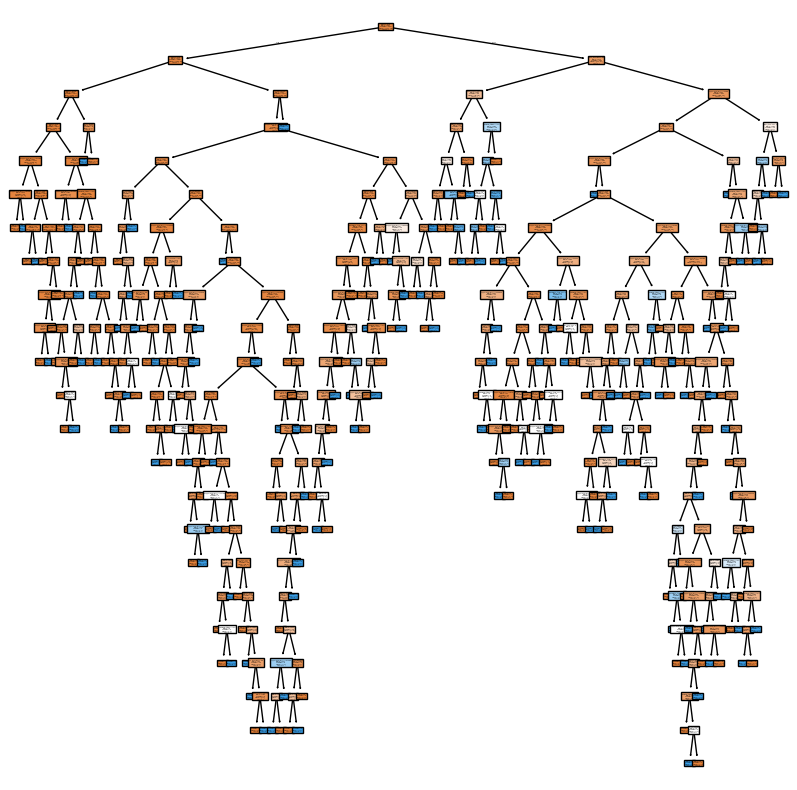

In [54]:
plt.figure(figsize=(10, 10))
tree.plot_tree(dtree, feature_names=features, class_names=['1','0'], filled=True)
plt.show()

In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
df = pd.read_csv("stroke-data.csv")

Accuracy: 0.9406392694063926


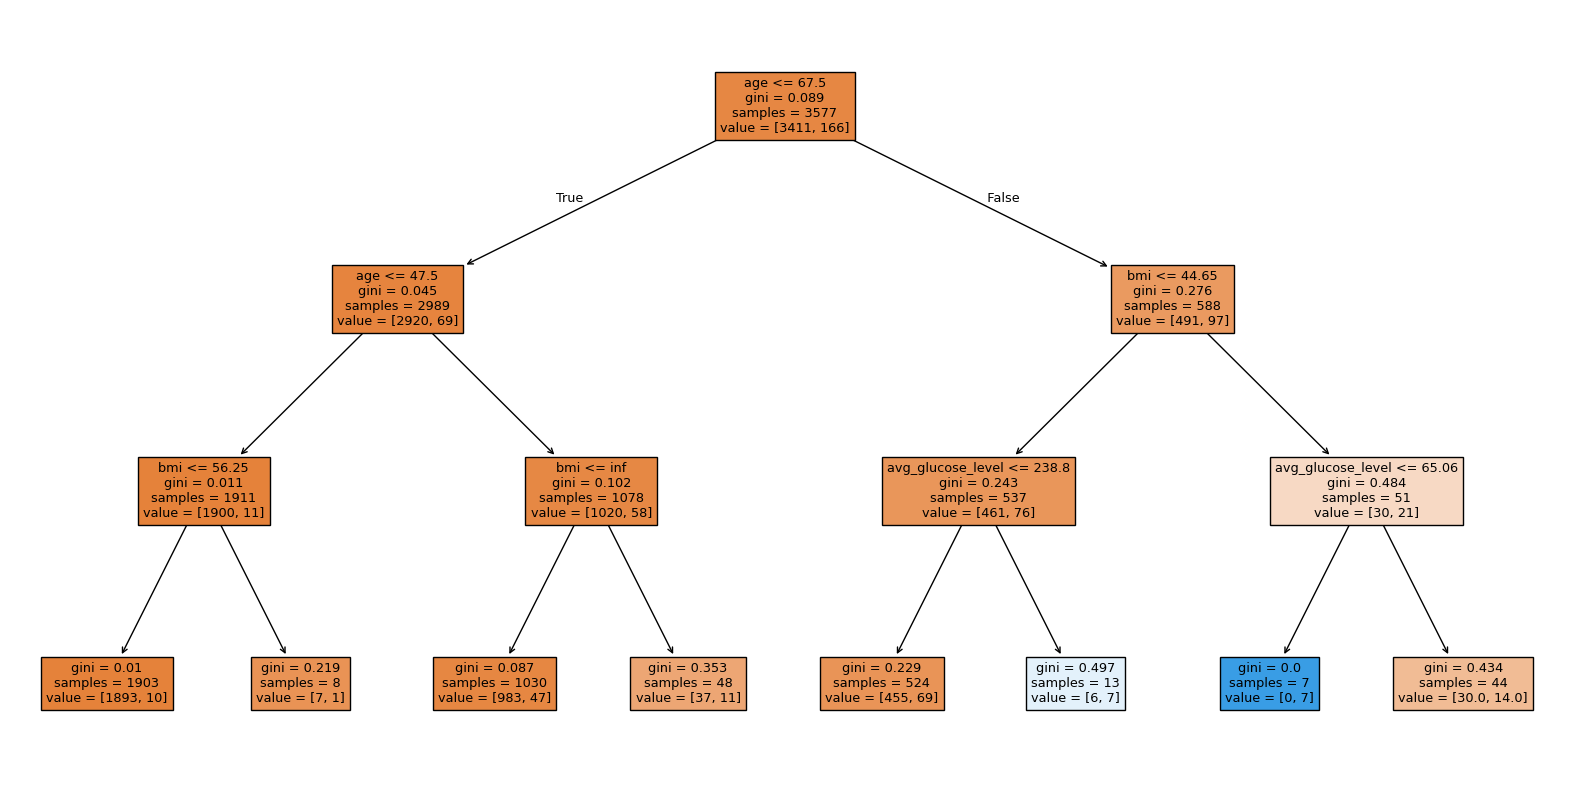

In [56]:
X = df.drop(['id'], axis=1)
selected_features = ['age', 'hypertension','heart_disease', 'avg_glucose_level', 'bmi']
X = df[selected_features]
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(max_depth=3) 
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=selected_features)
plt.show()

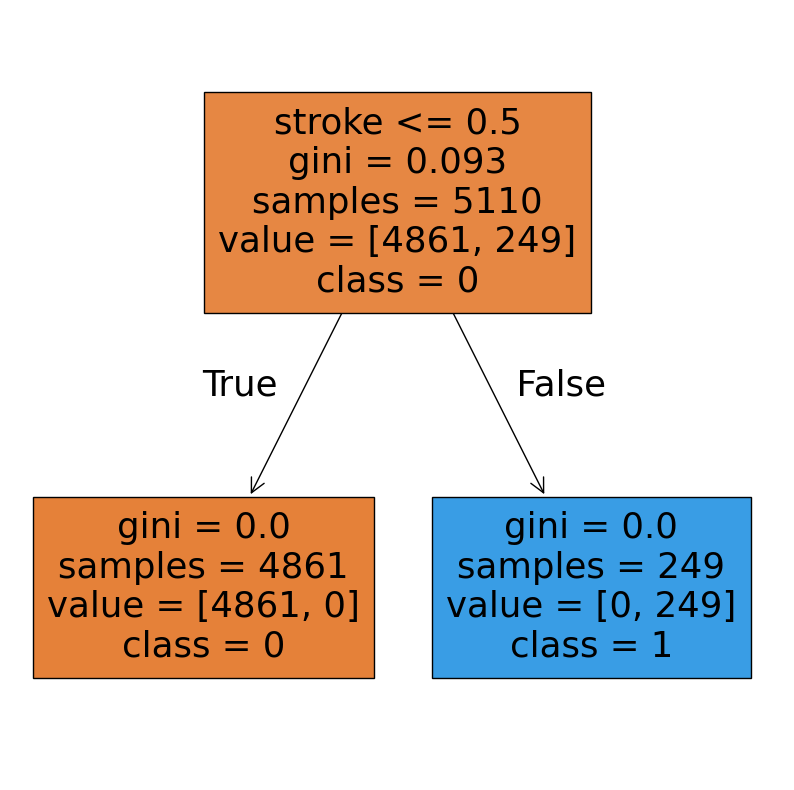

In [57]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("stroke-data.csv")

# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Specify the numeric columns to fill missing values with mean
numeric_columns = [
    'age','avg_glucose_level','bmi'
]
for column in numeric_columns:
    df[column] = df[column].astype(float).fillna(df[column].mean())
# Fill missing values with mode for categorical columns
categorical_columns = ['id','gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status' ,'stroke'  
]
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])
# Map categorical values to numeric
d = {'Female': 0, 'Male': 1, 'Other': 2}
df['gender'] = df['gender'].map(d)

d = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}
df['smoking_status'] = df['smoking_status'].map(d)

d = {'Urban': 0, 'Rural': 1}
df['Residence_type'] = df['Residence_type'].map(d)

d = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(d)

d = {'Private': 0, 'Self-employed': 1, 'Self-employed': 2, 'Govt_job' : 3}
df['work_type'] = df['work_type'].map(d)

features = ['id','gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status' ,'stroke','age','avg_glucose_level','bmi'] 
X = df[features]
y = df['stroke']
# Create and train the decision tree model
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
# Plot the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(dtree, feature_names=features, class_names=['0', '1'], filled=True)
plt.show()

Accuracy: 1.0


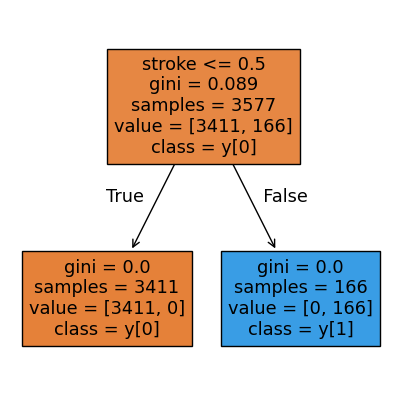

In [58]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
df = pd.read_csv("stroke-data.csv")
# Drop the User_ID column
x = df.drop(['id'], axis=1)
y = df['stroke']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()
# Train the classifier
clf = clf.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Plot the decision tree
plt.figure(figsize=(5,5))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True)
plt.show()

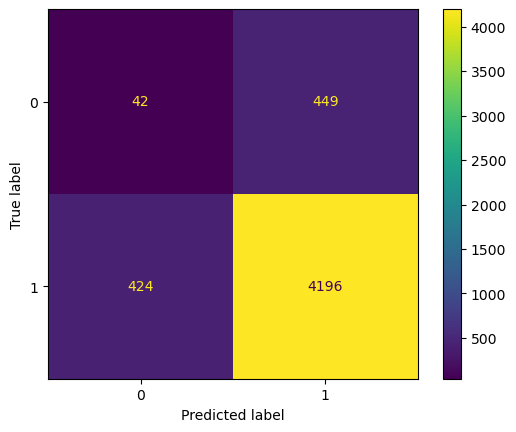

In [59]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 5111)
predicted = np.random.binomial(1,.9,size = 5111)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [60]:
#split dataset in features and target variable
feature_cols = ['id','gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status' ,'stroke','age','avg_glucose_level','bmi']
X = df[feature_cols] # Features
y = df.stroke # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
feature_cols = ['id','gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','age','avg_glucose_level','bmi']
X = df[feature_cols].copy()  # Features
y = df.stroke  # Target variable
# Encode feature columns with value between 0 and n_classes-1
label_encoders = {}
for col in feature_cols:
    le = LabelEncoder()
    X[col] = X[col].apply(lambda x: le.fit_transform([x])[0])
    label_encoders[col] = le
# Encode target labels with value between 0 and n_classes-1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=1)
# Create Decision Tree classifier object with criterion="entropy" and max_depth=3
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9458577951728636


In [62]:
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 5111)
predicted = numpy.random.binomial(1,.9,size = 5111)
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.8131481119154764


In [63]:
Precision = metrics.precision_score(actual, predicted)
print(Precision)

0.8997159711601486


In [64]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(Sensitivity_recall)

0.8925010836584308


In [65]:
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall})

{'Accuracy': 0.8131481119154764, 'Precision': 0.8997159711601486, 'Sensitivity_recall': 0.8925010836584308}


In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import combinations
df = pd.read_csv("stroke-data.csv")
# Encode categorical variables
df['gender'] = df['gender'].astype('category').cat.codes
df['ever_married'] = df['ever_married'].astype('category').cat.codes
df['stroke'] = df['stroke'].astype('category').cat.codes
df['smoking_status'] = df['smoking_status'].astype('category').cat.codes
df['work_type'] = df['work_type'].astype('category').cat.codes
df['Residence_type'] = df['Residence_type'].astype('category').cat.codes
df['heart_disease'] = df['heart_disease'].astype('category').cat.codes
df['hypertension'] = df['hypertension'].astype('category').cat.codes
# Define all possible features
all_features = [
    'id','gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status' ,'age','avg_glucose_level','bmi']
# Initialize variables to store the best accuracy and corresponding features
best_accuracy = -1
best_features = []
# Iterate over all possible combinations of features
for i in range(1, len(all_features) + 1):
    for combo in combinations(all_features, i):
        X = df[list(combo)]
        y = df['stroke']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
        dtree = DecisionTreeClassifier()
        dtree = dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = combo
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Features: {best_features}")

Best Accuracy: 0.9458577951728636
Best Features: ('gender',)
